## Team Members: 
- Gavin Robertson
- Aaron Ravela
- Nick Wilson

# Imports(start here)

In [35]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [47]:
#Found on Kaggle
#https://www.kaggle.com/datasets/mohankrishnathalla/medical-insurance-cost-prediction

raw = pd.read_csv('https://raw.githubusercontent.com/Abled773/HI-Risk-Prediction-and-Analysis/main/medical_insurance.csv')

# Understanding the Data

In [27]:
# 54 Columns
raw.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [28]:
raw.shape

(100000, 54)

In [29]:
raw.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [30]:
# Data dTypes are well defined and only have 10 object Dtypes
# Some of the objects can be converted to categorical later on for consistency

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [33]:
raw.describe(include="all")

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,100000,100000,100000,1.000000e+05,100000,100000,100000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,3,5,3,NaN,6,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,South,Urban,NaN,Bachelors,Married,Employed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,49193,28029,60019,NaN,27996,53252,55269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50000.500000,47.521500,NaN,NaN,NaN,4.987390e+04,NaN,NaN,NaN,2.430900,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,NaN,NaN,NaN,4.680021e+04,NaN,NaN,NaN,1.075126,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,NaN,NaN,NaN,1.100000e+03,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,NaN,NaN,NaN,2.110000e+04,NaN,NaN,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,NaN,NaN,NaN,3.620000e+04,NaN,NaN,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,NaN,NaN,NaN,6.220000e+04,NaN,NaN,NaN,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000


In [34]:
# This is a strong dataset with no null values in all of the columns besides alcohol_freq
raw.isna().sum()


person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

In [9]:
# No Duplicate Rows
raw.duplicated().sum()

0

## Summary of structure analysis
From the Structure analysis, we can see the data:

 * Has a size of 5400000(100000 x 54)
 * Has well defined data types (13 floats, 31 ints, 10 objects)
 * All columns do not have null values and exist in all rows except for alchohol frequency
 * No duplicate rows








---



# Data Cleaning

Because this data is so well-defined, it needs very little cleaning in order to be operational. Still there are some tasks that we can do:

 * Remove unnecessary data for Risk analysis
 * Manage missing alchohol frequency data
 * Change some object data types to categorical
 * Create a table suitable for correlation analysis
 * Create a table suitable for regression

## Changing Object Data Types

In [10]:
# show all object dType columns and put them in a list
obj_cols = list(raw.select_dtypes(include='object').columns)
obj_cols

['sex',
 'region',
 'urban_rural',
 'education',
 'marital_status',
 'employment_status',
 'smoker',
 'alcohol_freq',
 'plan_type',
 'network_tier']

In [11]:
#see the range of data of object data types
for col in obj_cols:
    print(f"Unique values for column '{col}': {raw[col].unique()}")

Unique values for column 'sex': ['Female' 'Male' 'Other']
Unique values for column 'region': ['North' 'Central' 'West' 'South' 'East']
Unique values for column 'urban_rural': ['Suburban' 'Urban' 'Rural']
Unique values for column 'education': ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
Unique values for column 'marital_status': ['Married' 'Single' 'Divorced' 'Widowed']
Unique values for column 'employment_status': ['Retired' 'Employed' 'Self-employed' 'Unemployed']
Unique values for column 'smoker': ['Never' 'Current' 'Former']
Unique values for column 'alcohol_freq': ['None' 'Weekly' 'Daily' 'Occasional']
Unique values for column 'plan_type': ['PPO' 'POS' 'HMO' 'EPO']
Unique values for column 'network_tier': ['Bronze' 'Gold' 'Platinum' 'Silver']


### Manage Missing Alcohol Frequency Data

Before we can deal with Alchohol frequency as a data type, we must manage the null values in this column. So let us look at the reasoning for these null values.

In [12]:
raw["alcohol_freq"].head(10)

0          None
1        Weekly
2          None
3          None
4         Daily
5         Daily
6    Occasional
7        Weekly
8          None
9        Weekly
Name: alcohol_freq, dtype: object

We can see that in the first 10 rows. There is no row that has a defined none category. Due to this, we can assume that null values mean that the patient does not consume alcohol.

For now we will leave it be and handle it when converting all object data types.

Now that we understand the object data, it's time to convert the data for correlation and regression analysis. Note that some columns will be modified once we get to modeling risk_score. This is because some of the columns that have no numerical data and no rankings cannot be correlated properly without one-hotting everything.

## Creating an Optimized Readable Data Table

In [13]:
# Copied raw table so we can create a clean table without affecting the original
data = raw.copy()

# Creating a clean READABLE table

# handle na alcohol values
data["alcohol_freq"] = data["alcohol_freq"].fillna("None")

# convert to category data types
data[obj_cols] = data[obj_cols].astype('category')

data['alcohol_freq'].value_counts()
data[obj_cols].info(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   sex                100000 non-null  category
 1   region             100000 non-null  category
 2   urban_rural        100000 non-null  category
 3   education          100000 non-null  category
 4   marital_status     100000 non-null  category
 5   employment_status  100000 non-null  category
 6   smoker             100000 non-null  category
 7   alcohol_freq       100000 non-null  category
 8   plan_type          100000 non-null  category
 9   network_tier       100000 non-null  category
dtypes: category(10)
memory usage: 978.5 KB


## Creating a Analysis-Ready Table

In [14]:
#one-hot all nominal values

#Create a copy of clean data, so we can create the analysis table safely.
transfer = data.copy()


nominal_cols = ["region","marital_status","employment_status","sex", "plan_type", "urban_rural"]
one_hot_nom = pd.get_dummies(transfer[nominal_cols], drop_first=True)

analysis_data = pd.concat([transfer.drop(nominal_cols, axis=1), one_hot_nom], axis=1)

analysis_data.head()

,person_id,age,income,education,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,...,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,sex_Male,sex_Other,plan_type_HMO,plan_type_POS,plan_type_PPO,urban_rural_Suburban,urban_rural_Urban
0,75722,52,22700.0,Doctorate,3,1,27.4,Never,None,2,...,1,0,0,0,0,0,0,1,1,0
1,80185,79,12800.0,No HS,3,1,26.6,Never,Weekly,2,...,0,0,0,0,0,0,1,0,0,1
2,19865,68,40700.0,HS,5,3,31.5,Never,None,1,...,1,0,0,1,0,1,0,0,0,0
3,76700,15,15600.0,Some College,5,3,31.6,Never,None,0,...,0,1,0,1,0,1,0,0,1,0
4,92992,53,89600.0,Doctorate,2,0,30.5,Never,Daily,3,...,0,1,0,1,0,0,1,0,1,0


In [15]:
# Create Ordinal Map
ordinal_maps = {
    'smoker': {'Never' : 0, 'Former' : 1, 'Current' : 2},
    'alcohol_freq': {"None" : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily' : 3},
    'education': {'No HS' : 0, 'HS' : 1, 'Some College' : 2, 'Bachelors' : 3, 'Masters' : 4, 'Doctorate' : 5},
    'network_tier': {'Bronze' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3},
}

for col, mapping in ordinal_maps.items():
    analysis_data[col] = analysis_data[col].map(mapping)


analysis_data[list(ordinal_maps.keys())].head(10)

,smoker,alcohol_freq,education,network_tier
0,0,0,5,0
1,0,2,0,2
2,0,0,1,3
3,0,0,2,1
4,0,3,5,3
5,0,3,1,1
6,0,1,4,1
7,0,2,1,2
8,2,0,0,2
9,0,2,3,2


## Conclusion (**Important**)

We have now created many tables used for different purposes. All of the existing tables' purposes will be listed below.

* raw

  The original imported table - is not cleaned.

* data
  
  This is a cleaned version of raw. It has converted null values in alcohol frequency to a defined "none". Converts all object data types to the category type.

  For visualization, please use this table.

* analysis_data

  This table is derived from the cleaned version. It encodes all category types into numeric data types that is readable for correlation and linear regression. **Note**, that this table is hard to read and not meant for the reader.
  
  Use this table for correlation and regression.


  Here is how it is encoded:

  * **Ordinal**
    
    These columns have a definitive ranking, so we can numerically rank these for analysis. The columns that are determined to be ordinal is smoker, alcohol_freq, education, education, and network_tier.

    Here is how they are organized:

    **smoker:**
    
    'Never' : 0, 'Former' : 1, 'Current' : 2
    
    **alcohol_freq:**
    
    'None' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily' : 3
    
    **'education':**
    
    'No HS' : 0, 'HS' : 1, 'Some College' : 2, 'Bachelors' : 3, 'Masters' : 4, 'Doctorate' : 5
    
    **'network_tier':**

    'Bronze' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3

   * **Nominal**
   
   Nominal value has no ranking amongst the categories, because of this, all nominal values are one-hot encoded. One-hot encoding creates a boolean column for each unique value. This of course create a ton of columns (71 to be exact). This makes the data very hard to read and performance intensive, but the computations can still be easily handled by modern cpu's.

   Here is the list of nominal values:
   
   "region",
   "marital_status",
   "employment_status",
   "sex",
   "plan_type",
   "urban_rural"





# Data Analysis(Correlation/Visualization)

In [16]:
# Remember this, as we will take a deeper look at risk_score_correlations again in the Data Analysis portion.
corr_matrix = analysis_data.corr(numeric_only=True)
risk_score_correlations = corr_matrix['risk_score']

# In short, we have created and then taken all of the columns risk_score correlation, and created a set that has all of the super weak correlation columns
# risk_score <= -0.1 (weak postive) risk_score >= -0.1 (weak negtive)
# weak_cols contains correalations(x) between [-0.1, 0.1]
weak_cols = risk_score_correlations[(risk_score_correlations <= 0.1) & (risk_score_correlations >= -0.1)]
weak_cols.shape[0] #get the amount of columns considered weak



30

In [17]:
corr_data = analysis_data.drop(columns=weak_cols.index)
corr_data.head()
corr_data.shape[1]

35

## Risk

Text(0.5, 1.0, 'Distribution of Risk Scores')

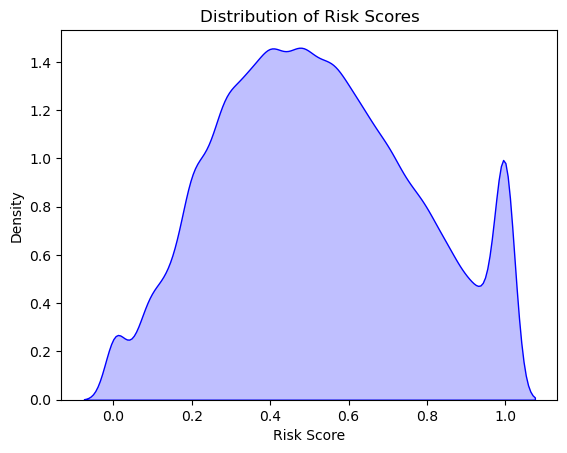

In [18]:
sns.kdeplot(data['risk_score'], fill=True, color='blue')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Distribution of Risk Scores')

In [19]:

# is_high_risk just means risk_score > 0.6
high_risk_people = data[data['is_high_risk'] == True]
low_risk_people = data[data['is_high_risk'] == False]

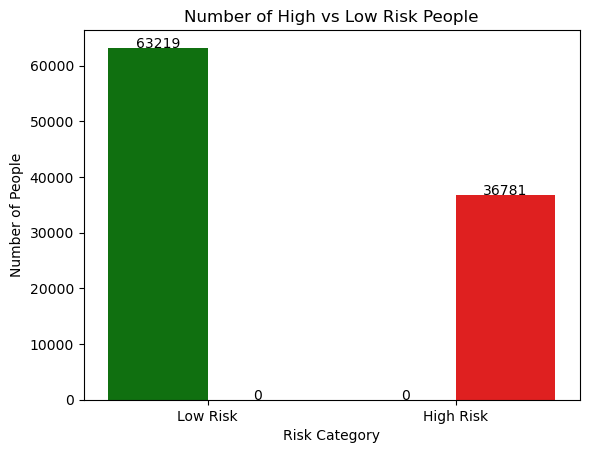

In [46]:
color = {True: 'red', False: 'green'}
ax = sns.countplot(x='is_high_risk', data=data, hue="is_high_risk", palette=color)
ax.legend_.remove()
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.xlabel('Risk Category')
plt.ylabel('Number of People')
plt.title('Number of High vs Low Risk People')

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center')

plt.show()

## Correlation Analysis

In [ ]:
corr_matrix = corr_data.corr(numeric_only=True)
risk_score_correlations = corr_matrix['risk_score']
risk_score_correlations

In [ ]:
# find all columns that correlate with risk score a notable amount (>0.1)
high_risk_score_correlations = risk_score_correlations[abs(risk_score_correlations) > 0.1].sort_values(ascending=False)[2:] # remove first two columns because they are not relevant
high_risk_score_correlations
# Age has highest correlation with risk score
# Then number of chronic conditions,
# Then blood pressure. Apparently systolic is more important than diastolic

In [ ]:
# negative risk score correlation means they are likely beneficial to your health
negative_risk_score_correlations = risk_score_correlations[risk_score_correlations < 0].sort_values(ascending=True)
# these are very low so it's questionable if they matter at all. Provider quality could matter a small amount
negative_risk_score_correlations

## Age
Age has the highest correlation with risk score

In [ ]:
data['age'].plot.hist(bins=20, xticks=range(0, 110, 10), title="Age distribution of dataset")

In [ ]:
average_age = data['age'].mean()
average_age

In [ ]:
# correlations with age
age_correlations = data.corr(numeric_only=True)['age']
irrelevant_age_cols = ['age', 'person_id', 'is_high_risk']
for col in irrelevant_age_cols:
    age_correlations.pop(col)
relevant_age_correlations = age_correlations[age_correlations > 0.1].sort_values(ascending=False)
relevant_age_correlations

Of the attributes we are looking at, blood pressure and number of chronic conditions are the main things that go up as you age that affect risk score

## Smoking

As seen in the graph below, current smokers have a much higher risk score on average than those who are not.
Surprisingly, former smokers have an almost identical risk score on average to those who never smoked

In [ ]:
data.groupby('smoker')['risk_score'].mean().plot.bar(ylabel="Risk score")

## Alcohol
Surprisingly, alcohol seems to have no real effect on the risk score

In [ ]:
data['alcohol_freq'].value_counts()

In [ ]:
data.groupby('alcohol_freq')['risk_score'].mean().plot.bar()
plt.ylim(0.45 , 0.55)
plt.ylabel("Risk score")
plt.xlabel(None)
plt.title("Risk score by frequency of alcohol consumption")

## Sex

Men and women have basically identical risk scores on average. 'Other' has a very slightly lower risk score for some reason. Probably just random variation because there

In [ ]:
data.groupby('sex')['risk_score'].mean().plot.bar()
plt.ylim(0.45 , 0.55)
plt.title("Risk score by sex")
plt.ylabel("Risk Score")

# Value counts

In [ ]:
for col in data.columns:
    print(data[col].value_counts(), "\n")

# Linear Regression Model("HEAVILY IN PROGRESS")

In [ ]:
test_data = analysis_data.drop(["risk_score", "is_high_risk"], axis=1)

#default split
data_train, data_test, risk_train, risk_test = train_test_split(test_data, analysis_data['risk_score'], random_state=42)

In [ ]:
#default Linear Regression model with all encodings
defaultModel = LinearRegression()
defaultModel.fit(data_train, risk_train)
def_risk_pred = defaultModel.predict(data_test)

In [ ]:
defaultModel.score(data_test, risk_test)

## Testing the Model's Error.

In [ ]:
print("R² on test set:", r2_score(risk_test, def_risk_pred))

In [ ]:
#mean squared error
mse = mean_squared_error(risk_test, def_risk_pred)
print("MSE on test set:", mse)

#root mean squared error
print("RMSE on test set:", np.sqrt(mse))

#mean absolute error
mae = mean_absolute_error(risk_test, def_risk_pred)
print("MAE on test set:", mae)


In [ ]:
residual = risk_test - def_risk_pred
sse = np.sum(residual**2)
rows, cols = analysis_data.shape
aic = rows * np.log(sse/rows) + 2*(cols + 1)

print("The AIC is: ", aic)

## Optimizing our Model

In [ ]:
numeric = list(test_data.select_dtypes(include=['int64','float64']).columns)

scaler=StandardScaler()
data_train[numeric] = scaler.fit_transform(data_train[numeric])
data_test[numeric] = scaler.transform(data_test[numeric])


In [ ]:
linearModel = LinearRegression()
linearModel.fit(data_train, risk_train)
risk_pred = linearModel.predict(data_test)
linearModel.score(data_test, risk_test)

## Inspecting the Model's Coefficients and Intercept

In [ ]:
intercept = linearModel.intercept_
print("Intercept:", intercept)
print("Coefficients:", linearModel.coef_)


In [ ]:
# Assuming your features are in a DataFrame called X_train or analysis_data
feature_names = data_train.columns  # or whatever table you trained on

# Create coef_table
coef_table = pd.Series(linearModel.coef_, index=feature_names)

# Sort features by absolute value of coefficient
sorted_features = sorted(coef_table.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

Test

In [ ]:
test_data = data.drop(["risk_score", "is_high_risk"], axis=1)
data_train, data_test, risk_train, risk_test = train_test_split(test_data, data['risk_score'], random_state=42)
model = CatBoostRegressor()
model.fit(data_train, risk_train, cat_features=obj_cols)


print(model.score(data_test, risk_test))

In [ ]:
risk_pred = model.predict(data_test)

In [ ]:
print("R² on test set:", r2_score(risk_test, risk_pred))

#mean squared error
mse = mean_squared_error(risk_test, risk_pred)
print("MSE on test set:", mse)

#root mean squared error
print("RMSE on test set:", np.sqrt(mse))

#mean absolute error
mae = mean_absolute_error(risk_test, risk_pred)
print("MAE on test set:", mae)

In [ ]:
feature_importances = model.get_feature_importance()
feature_names = data.columns  # Your feature DataFrame

# Combine into a table
importance_table = dict(zip(feature_names, feature_importances))

# Sort by importance
sorted_importance = sorted(importance_table.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.2f}")

In [ ]:
data_ = data[["total_claims_paid","age","smoker","bmi"]]
test_data = data.drop(["risk_score", "is_high_risk"], axis=1)

data_train, data_test, risk_train, risk_test = train_test_split(data_, data['risk_score'], random_state=42)
model = CatBoostRegressor()
model.fit(data_train, risk_train, cat_features=["smoker"])


print(model.score(data_test, risk_test))

## Final Graphs: Correlation Heatmap

In [ ]:
cols = [
    "bmi","smoker","alcohol_freq",
    "hypertension","diabetes","copd","cardiovascular_disease","cancer_history",
    "kidney_disease","liver_disease","arthritis","mental_health","chronic_count",
    "systolic_bp","diastolic_bp","ldl","hba1c","risk_score",
]

df_subset = raw[cols]

# Keep only numeric columns for correlation
num_cols = df_subset.select_dtypes(include=["float64","int64"]).columns

corr = df_subset[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Risk Score vs Lifestyle & Clinical Variables")
plt.show()

## Correlation Barplot

In [ ]:
corrs = df_subset[num_cols].corr()["risk_score"].drop("risk_score")
corrs = corrs.abs().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=corrs.values, y=corrs.index, palette="viridis")
plt.title("Correlation Strength with Risk Score")
plt.xlabel("Correlation (absolute value)")
plt.ylabel("Variable")
plt.show()

## Linear Regression Model

In [ ]:
# Select predictors and target
predictors = [
    "bmi","smoker","alcohol_freq",
    "hypertension","diabetes","copd","cardiovascular_disease","cancer_history",
    "kidney_disease","liver_disease","arthritis","mental_health","chronic_count",
    "systolic_bp","diastolic_bp","ldl","hba1c"
]
X = raw[predictors].copy()   # <-- use .copy() to avoid slice warnings
y = raw["risk_score"]

# Encode categorical predictors safely
for col in ["smoker","alcohol_freq"]:
    X.loc[:, col] = X[col].astype("category").cat.codes

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Validate with R²
print("R² on test set:", model.score(X_test, y_test))

# Predict
y_pred = model.predict(X_test)

# Plot predicted vs actual
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Linear Regression: Predicted vs Actual Risk Score")
plt.show()

# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Residuals")
plt.title("Residuals of Linear Regression Model")
plt.show()